## Decision Trees and Ensemble Learning

In this project, we'll learn trees usind <b> Decision Tree</b> and <b>Ensemble learning</b>.

The project is <b>Credit Risk Score</b> for loan applicants using using <b>CreditScoring.csv</b> dataset.

## Data Preparation and Cleaning

- Loading the dataset
- Re-encoding the categorical variables
- Doing the train/validation/test split

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("CreditScoring.csv")
df = pd.DataFrame(dataset)
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


There are categorical variables that are in numerical format that should be converted back to categorical for easy understanding. They include <b> status, home, marital, Recored and Job.</b>

In [4]:
# let's start with status
status_values = {
    1: "ok",
    2: "default",
    0: "unk"
}
df.status = df.status.map(status_values)

In [5]:
# Now for all other categorical features
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [7]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


From statistical results above, some features have <b>99999999.0</b>for Max values which means that there are <b> missing values</b>. We'll handle them next 

In [8]:
# replace those 99999999.0 with nan
for c in ["income", "assets", "debt"]:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [9]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [10]:
# Let's also remove the unkown value of status so that we only remain with OK and Default
df = df[df.status != "unk"].reset_index(drop=True)

Next we split the data frame in <b> train, validation, test</b>

In [11]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [14]:
# create our target variable as we convert the values from categorical format to numerical format
y_train = (df_train.status == "default").astype("int").values
y_val = (df_val.status == "default").astype("int").values
y_test = (df_test.status == "default").astype("int").values

In [15]:
# now we remove the target variables from the rest so that they are not accidentally used as X
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [16]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision Trees

- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controling the size of a tree

In [17]:
# a simple decision tree using if else statement
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [18]:
# let's test the decision tree above
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [19]:
assess_risk(xi)

'ok'

And it works well given that the client's job is Freelance and the assests are 10000

In [20]:
# Now let's train using sklean's DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [21]:
# convert the train data frame into dictionaries as we fill missing values with zeros
train_dicts = df_train.fillna(0).to_dict(orient="records")

In [22]:
# handle categorical variables
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [23]:
# check feature names
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [24]:
# Now train the DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# test the model using validation dataset
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [26]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [27]:
# calculate the roc auc of the model
roc_auc_score(y_val, y_pred)

0.6589511031459641

In [28]:
# AUC of the training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

Given that the model's <b>ROC AUC score</b> in validation set is 0.65 and that of train dataset is 1.0, it suggests that there is a problem of overfitting.

Now this might be due to the model learning too deep to an extent it memorizes specific information about clients hence fail to <b>generalize</b>.

We can try to prevent this by restricting the level as to which the model can reach when it is training as shown below.

In [29]:
# create a new model which only goes as far as to the depth of 3
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
# auc when the tree is restricted to 3 levels
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print("train: ", auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("val: ", auc)

train:  0.7761016984958594
val:  0.7389079944782155


As seen above, the model is better than when it was before restricting to 3 levels, however if it is restricted too much, the results will be even worse.

In [31]:
# lets visualize the rules the tree learned from
from sklearn.tree import export_text

In [32]:
print(export_text(dt))

|--- feature_26 <= 0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_12 <= 74.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  74.50
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_2 <= 8750.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  8750.00
|   |   |   |--- class: 0
|--- feature_26 >  0.50
|   |--- feature_27 <= 6.50
|   |   |--- feature_1 <= 862.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  862.50
|   |   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- feature_12 <= 103.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  103.50
|   |   |   |--- class: 0



## Decision tree learning algorithm

- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [33]:
# let's create a small dataset for demonstration
data = [
    [8000, "default"],
    [2000, "default"],
    [0, "default"],
    [5000, "ok"],
    [5000, "ok"],
    [4000, "ok"],
    [9000, "ok"],
    [3000, "default"],
]

df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [34]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [35]:
# potential thresholds for splitting the dataframe
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [36]:
from IPython.display import display

In [37]:
# demonstrate splitting using the various splits
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

    
    print()

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64



In [38]:
# dataset with more than one feature
data = [
    [8000, 3000, "default"],
    [2000, 1000, "default"],
    [0, 1000, "default"],
    [5000, 1000, "ok"],
    [5000, 1000, "ok"],
    [4000, 1000, "ok"],
    [9000, 500, "ok"],
    [3000, 2000, "default"],
]

df_example = pd.DataFrame(data, columns=["assets","debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [39]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [40]:
# generalized potential thresholds for splitting the dataset with more than one feature
thresholds = {
    "assets": [0, 2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000]
}

In [41]:
for feature, Ts in thresholds.items():
    print("##########")
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))


        print()
    print("##########")

##########
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


ok         0.75
default    0.25
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

##########
##########
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.571429
ok         0.428571
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.666667
default    0.333333
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

##########


## Decision Trees Parameter Tuning

- Selecting max_depth
- selecting min_samples_leaf

In [42]:
# create a DecisionTree model based on different set depths as you calculate auc of each
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print("%4s -> %.3f" % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.748
  10 -> 0.701
  15 -> 0.662
  20 -> 0.659
None -> 0.662


In [43]:
# implementing min_samples_leaf to the model
scores = []

for d in [4, 5, 6, 7, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

In [44]:
# create a data frame for the scores
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [45]:
df_scores.sort_values(by="auc", ascending=False).head()

,max_depth,min_samples_leaf,auc
40,10,15,0.789400
58,20,15,0.787738
49,15,15,0.787051
22,6,15,0.785250
41,10,20,0.783606


In [46]:
# pivote the data frame to visualize it well
df_scores_pivot = df_scores.pivot(index="min_samples_leaf",
                                 columns=["max_depth"], values=["auc"])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      10     15     20
min_samples_leaf                                                 
1                 0.761  0.767  0.754  0.739  0.695  0.660  0.648
2                 0.761  0.767  0.763  0.752  0.713  0.679  0.686
5                 0.761  0.768  0.760  0.759  0.719  0.717  0.706
10                0.761  0.762  0.778  0.763  0.769  0.760  0.761
15                0.764  0.772  0.785  0.780  0.789  0.787  0.788
20                0.761  0.774  0.773  0.779  0.784  0.783  0.783
100               0.756  0.763  0.776  0.780  0.780  0.780  0.780
200               0.747  0.759  0.768  0.768  0.768  0.768  0.768
500               0.680  0.680  0.680  0.680  0.680  0.680  0.680

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

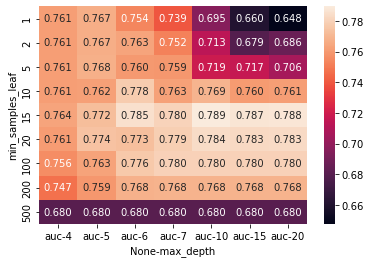

In [47]:
# visualize it as a heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

Using a max_depth of 6 and min_samples_leaf of 15 seems to work well. Let's implement it to a model.

In [48]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensemble Learning and Random Forest

- Board experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [49]:
# import RandomForestClassifier from sklearns ensemble
from sklearn.ensemble import RandomForestClassifier

In [50]:
# create a random forest model
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [51]:
# probability predict based on validation set
y_pred = rf.predict_proba(X_val)[:, 1]
# auc score
roc_auc_score(y_val, y_pred)

0.7744726453706618

In [52]:
# examine what happend when the number of estimators changes
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [53]:
# create a scores data frame for easy visualization
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])

In [54]:
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


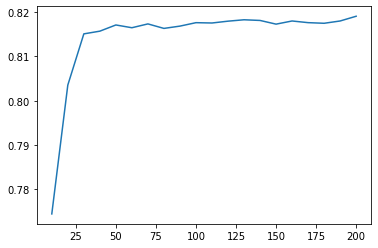

In [55]:
# plot the graph of estimators and auc score to see the number of trees necessay for the model
plt.plot(df_scores.n_estimators, df_scores.auc)

The plot above indicates that the model's score increases up until when it reaches 50 trees, it then remains to be stagnant for the rest number of trees.

This then implies that the required number of trees for this model is 50, the rest don't contribute much to the performance of the model.

In [56]:
# Now let's tune the random forest by training it using different depths for the trees
# using max_depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d, 
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [57]:
# df_score dataframe with max_depth features
columns = ["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


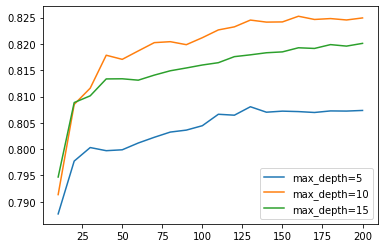

In [58]:
# A plot of the different depths performances
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc,
            label="max_depth=%d" % d)
    
plt.legend()

From the plot above, the best size of depth is 10.

Now let's find out that of min_sample_leaf

In [59]:
max_depth = 10

In [60]:
# tune it further as we find out the best min_sample_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [61]:
columns = ["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.791365
1,1,20,0.808496
2,1,30,0.811584
3,1,40,0.817839
4,1,50,0.817058


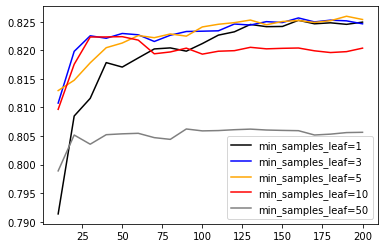

In [62]:
# A plot of the different min_sample_leaf performances
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, color=col,
            label="min_samples_leaf=%s" % s)
    
plt.legend()

In [63]:
min_samples_leaf = 3

Here our best min_sample_leaf is 3 and it works well at around 100 because beyond that the model is fairly stagnant.

We'll now retrain the model using these two parameters, that is, max_depth of 10 and min_sample_leaf of 3.

In [64]:
# retrain the model
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1,
                            n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_jobs=-1,
                       random_state=1)

## Gradient boosting and XGBoost

- Gradient boosting vs Random Forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

In [65]:
# import xgboost
import xgboost as xgb

In [66]:
# wrap the training dataset into a XGBoost's Dmatrix datamatrix for easy training with xgboost
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [67]:
# train the model
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    
    "objective": "binary:logistic",
    "nthread": 8,
    
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [68]:
y_pred = model.predict(dval)

In [69]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [70]:
# evaluate the model based on the training data by creating a watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

Create parameters for the model then train it as you capture the results in a variable called <b>output</b>

In [71]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [72]:
s = output.stdout

In [73]:
print(s[:200])

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	tr


In [74]:
# split the auc scores so that you can visualize them differently
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [75]:
df_score = parse_xgb_output(output)

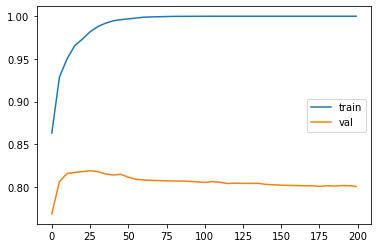

In [76]:
# plot the score dataframe
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

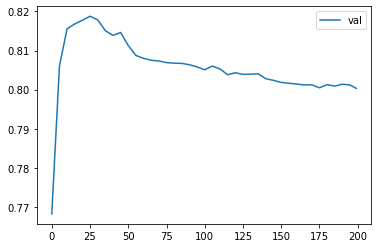

In [77]:
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend()

## XGBoost Parameter Tuning

- eta
- max_depth
- min_child_weight

To tune the eta parameter, you will have to first create a dictionary then test different values for the parameter for example 0.3, 1.0, 0.1 etc. then plot them to visualize all of them so that you can select the best one for the model.

In [78]:
# create a dictionary for scores
scores = {}

retrain the model so that it can be used to tune the <b>eta</b> parameter.

In [86]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [87]:
# make eta the key of the scores dictionary
key = "eta=%s" % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [88]:
scores.keys()

dict_keys(['eta=0.1', 'eta=1.0', 'eta=0.3'])

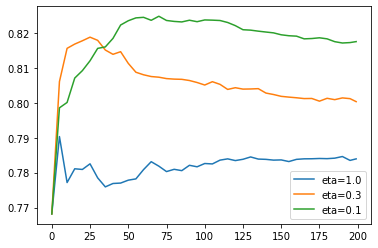

In [89]:
# plot all the keys
etas = ["eta=1.0", "eta=0.3", "eta=0.1"]
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

From the visualization above, the best eta value is 0.1. So we'll use it here.

Just like when tuning the eta parameter, tuning the max_depth also requires testing it with several different values then ploting to visualize the performance of each values as demonstrated below.

In [90]:
# reset the scores dictionary for tuning the max_depth parameter
scores = {}

retrain the model for tuning the <b>max_depth</b> parameter

In [96]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [97]:
# make max_depth parameter the key of the scores dictionary for tuning it.
key = "max_depth=%s" % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=5'

In [98]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=3', 'max_depth=5'])

In [99]:
del scores["max_depth=10"]

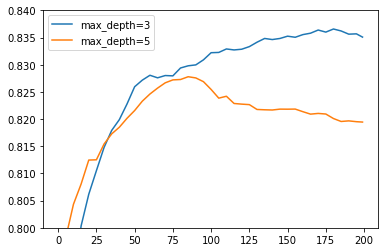

In [100]:
# create a plot to visualize them and choose the best one for the model
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.8, 0.84)
plt.legend()

From the above visulization, the best max_depth to use for the model is 3

Now let us tune the min_child_weight parameter

In [101]:
del scores["max_depth=3"]
del scores["max_depth=5"]

In [106]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 50,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [107]:
key = "min_child_weight=%s" % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=50'

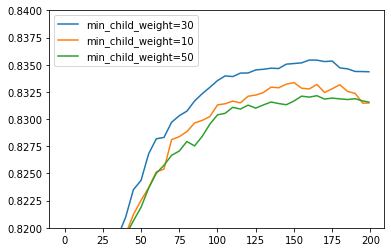

In [108]:
# create a plot to visualize them and choose the best one for the model
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.82, 0.84)
plt.legend()

min_child_weight seems to be good but considering the number of iterations, 30 is the best one to use. This is because it has 175 iteration while 1 has more than that.

Now let's train the final model below using the best parameters. Change the number of iterations to 175

In [109]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

## Selecting the Best Model

- choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

First, let us put all the three models below.

In [110]:
# best Decision Tree model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [111]:
# evaluate the performance of the decision tree
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7848562640769174

In [112]:
# best random forest model
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [113]:
# evaluate the performance of the random forest model
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8246258264512848

In [114]:
# best xgboost model
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [115]:
# evaluate the performance of the xgboost model
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

Evaluating all the three models separately clearly shows that the XGBoost model is better than the Random forest model and the decision tree model.

### Train the final model

Here we'll use the full train dataset for training the final model and test set for evaluating the performance of the model

In [116]:
df_full_train = df_full_train.reset_index(drop=True)

In [117]:
# create the target variable
y_full_train = (df_full_train.status == "default").astype(int).values

In [118]:
# remove the target variable from df_full_train so that it is not accidentally used as X variable
del df_full_train["status"]

In [119]:
# create feature matrices
dicts_full_train = df_full_train.to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [120]:
# create xgboost's Dmatrix for both full_train and test set respectively
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                        feature_names=dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [121]:
# train the final model with full train dataset
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)

In [122]:
# model prediction
y_pred = model.predict(dtest)

In [124]:
# evaluate the model
roc_auc_score(y_test, y_pred)

0.8322662626460096

## Building your Prediction Service with BentoML

In [126]:
import bentoml
bentoml.xgboost.save_model("credit_rist_model", model)

Model(tag="credit_rist_model:vbxzb2at4gzxwpex", path="C:\Users\ojare\bentoml\models\credit_rist_model\vbxzb2at4gzxwpex\")